In [313]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [314]:
base_folder = "/data3/lsf/Pein/Power-Prediction/res_output/"

time_folder = "24-08-17-mlp_v3-search-8procs"


path = base_folder + time_folder + "_result/" + time_folder + "-joined_metrics.csv"
df = pd.read_csv(path)

# Truncate values larger than 3000 to be 3000
clip_value = 100000
df["train_rmse"] = df["train_rmse"].clip(upper=clip_value)
df["val_rmse"] = df["val_rmse"].clip(upper=clip_value)
df["test_rmse"] = df["test_rmse"].clip(upper=clip_value)

# Display the first few rows of the dataframe
print(df.columns)

# remove those rows where the val_rmse and test_rmse are larger than 1000
# df = df[df["val_rmse"] <= 1000]
# df = df[df["test_rmse"] <= 1000]

# remove df where the rows values are repeated
df = df.drop_duplicates(subset=["train_rmse", "val_rmse", "test_rmse"], keep="first")


Index(['exp_date', 'train_rmse', 'train_custom_acc', 'val_rmse_for_best_train',
       'val_custom_acc_for_best_train', 'test_rmse_for_best_train',
       'test_custom_acc_for_best_train', 'train_epoch_for_best_train',
       'val_rmse', 'val_custom_acc', 'train_rmse_for_best_val',
       'train_custom_acc_for_best_val', 'test_rmse_for_best_val',
       'test_custom_acc_for_best_val', 'val_epoch_for_best_val', 'test_rmse',
       'test_custom_acc', 'train_rmse_for_best_test',
       'train_custom_acc_for_best_test', 'val_rmse_for_best_test',
       'val_custom_acc_for_best_test', 'test_epoch_for_best_test', 'skip_mode',
       'True', 'False', '16', '0.005', '48', '96', '512', '32', '4', '12',
       '13', '128', '11dropout', 'norm_type', 'num_heads', 'bs', '0.001', '64',
       '8', '6', '9', '5dropout', '256', '9dropout', 'conv', 'mha', 'mlp',
       'use_pos', 'seq_len', 'lr', 'd', 'hid_d', 'last_d', 'tok_d', 'time_d',
       'pos_d', 'e_layers', 'tok_conv_k', 'conv_out_d', 'feat_co

In [315]:
import math
def plot_rmse_effects(df, x, y=['train_custom_acc', 'val_custom_acc', 'test_custom_acc']):
    for rmse in y:
        # Calculate the grid size
        num_features = len(x)
        num_rows = math.ceil(num_features / 3)  # Number of rows required
        num_cols = min(3, num_features)  # Number of columns (max 3)
        
        # Create subplots with the calculated grid size
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(6*num_cols, 6*num_rows))

        # Flatten axes array if there's more than one row
        if num_rows > 1:
            axes = axes.flatten()
        else:
            axes = [axes]  # Wrap single row axes in a list

        for i, feature in enumerate(x):
            sns.boxplot(ax=axes[i], x=feature, y=rmse, data=df)
            for label in axes[i].get_xticklabels():
                label.set_rotation(45)
        
        # Remove any empty subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])
        
        # Adjust layout to make sure plots are not overlapping
        plt.tight_layout()
        plt.show()

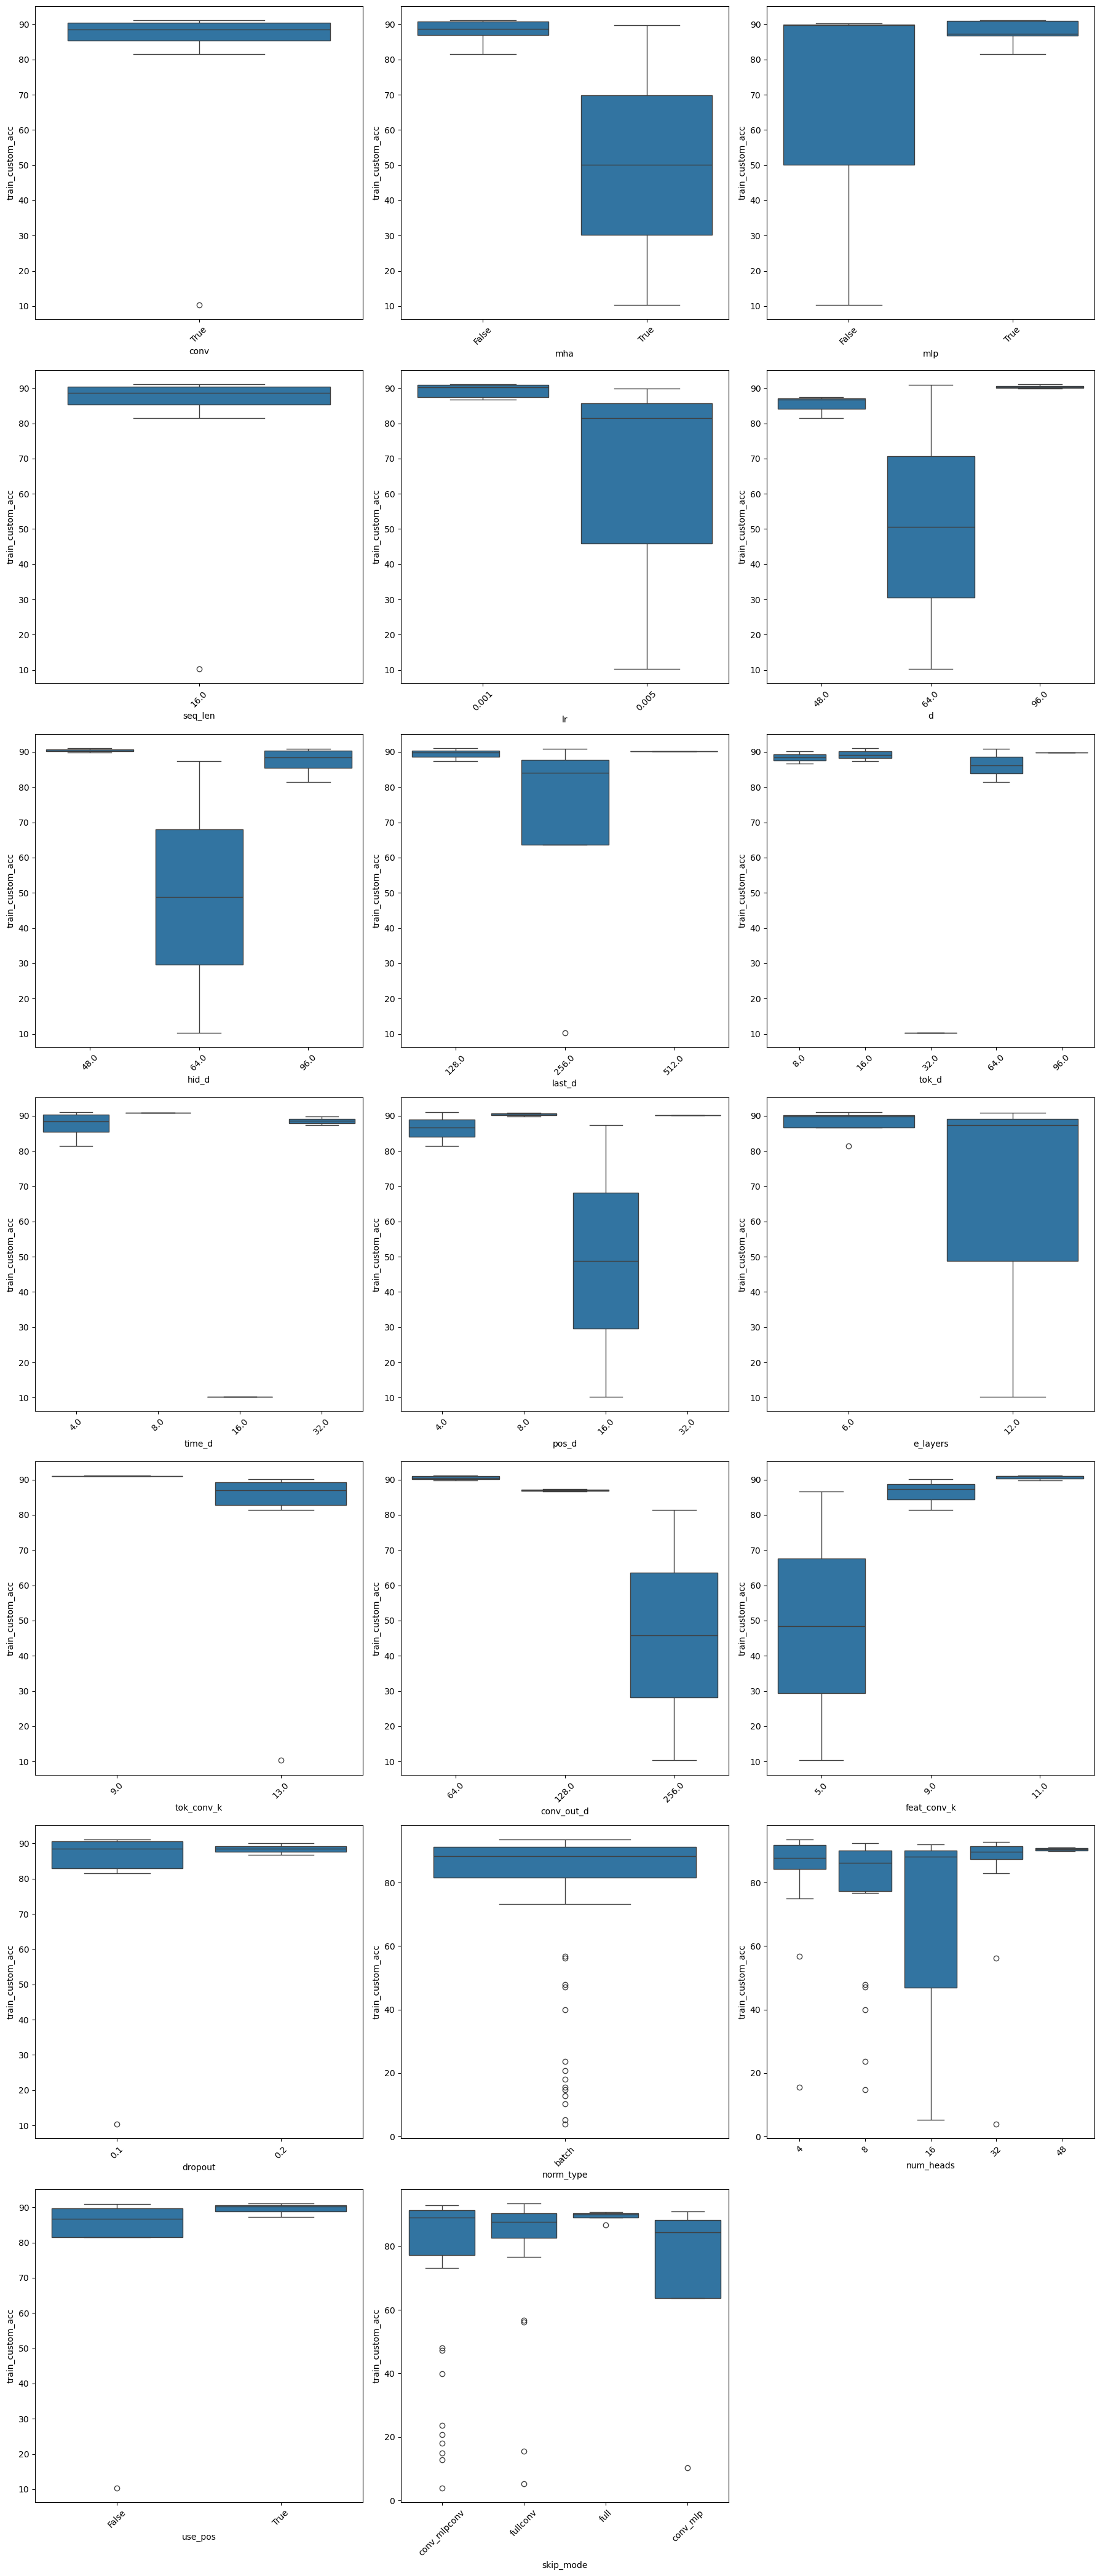

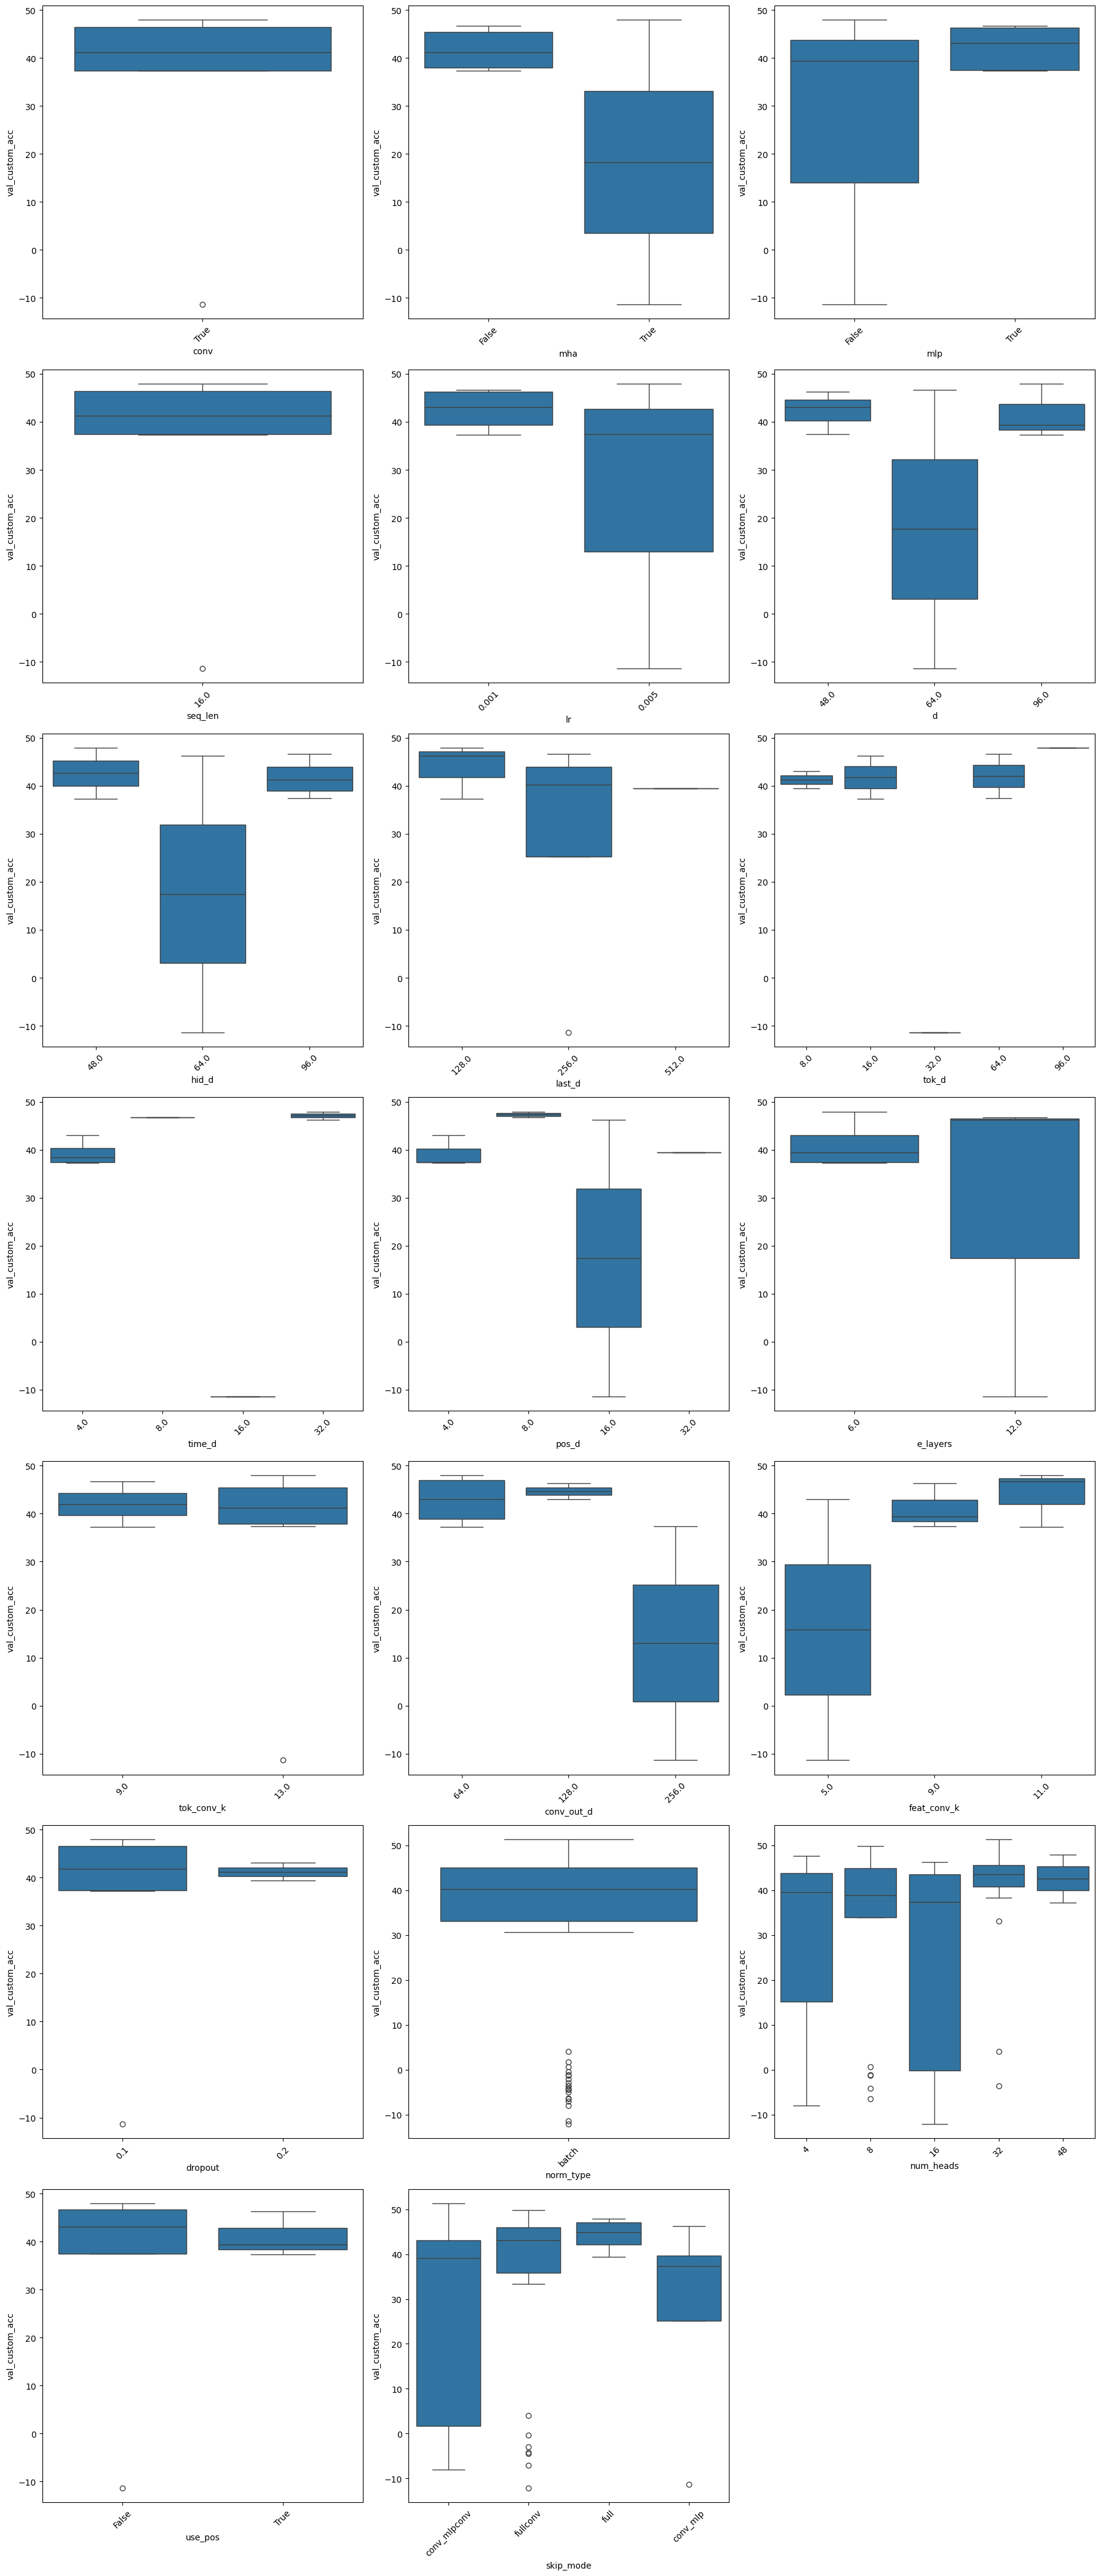

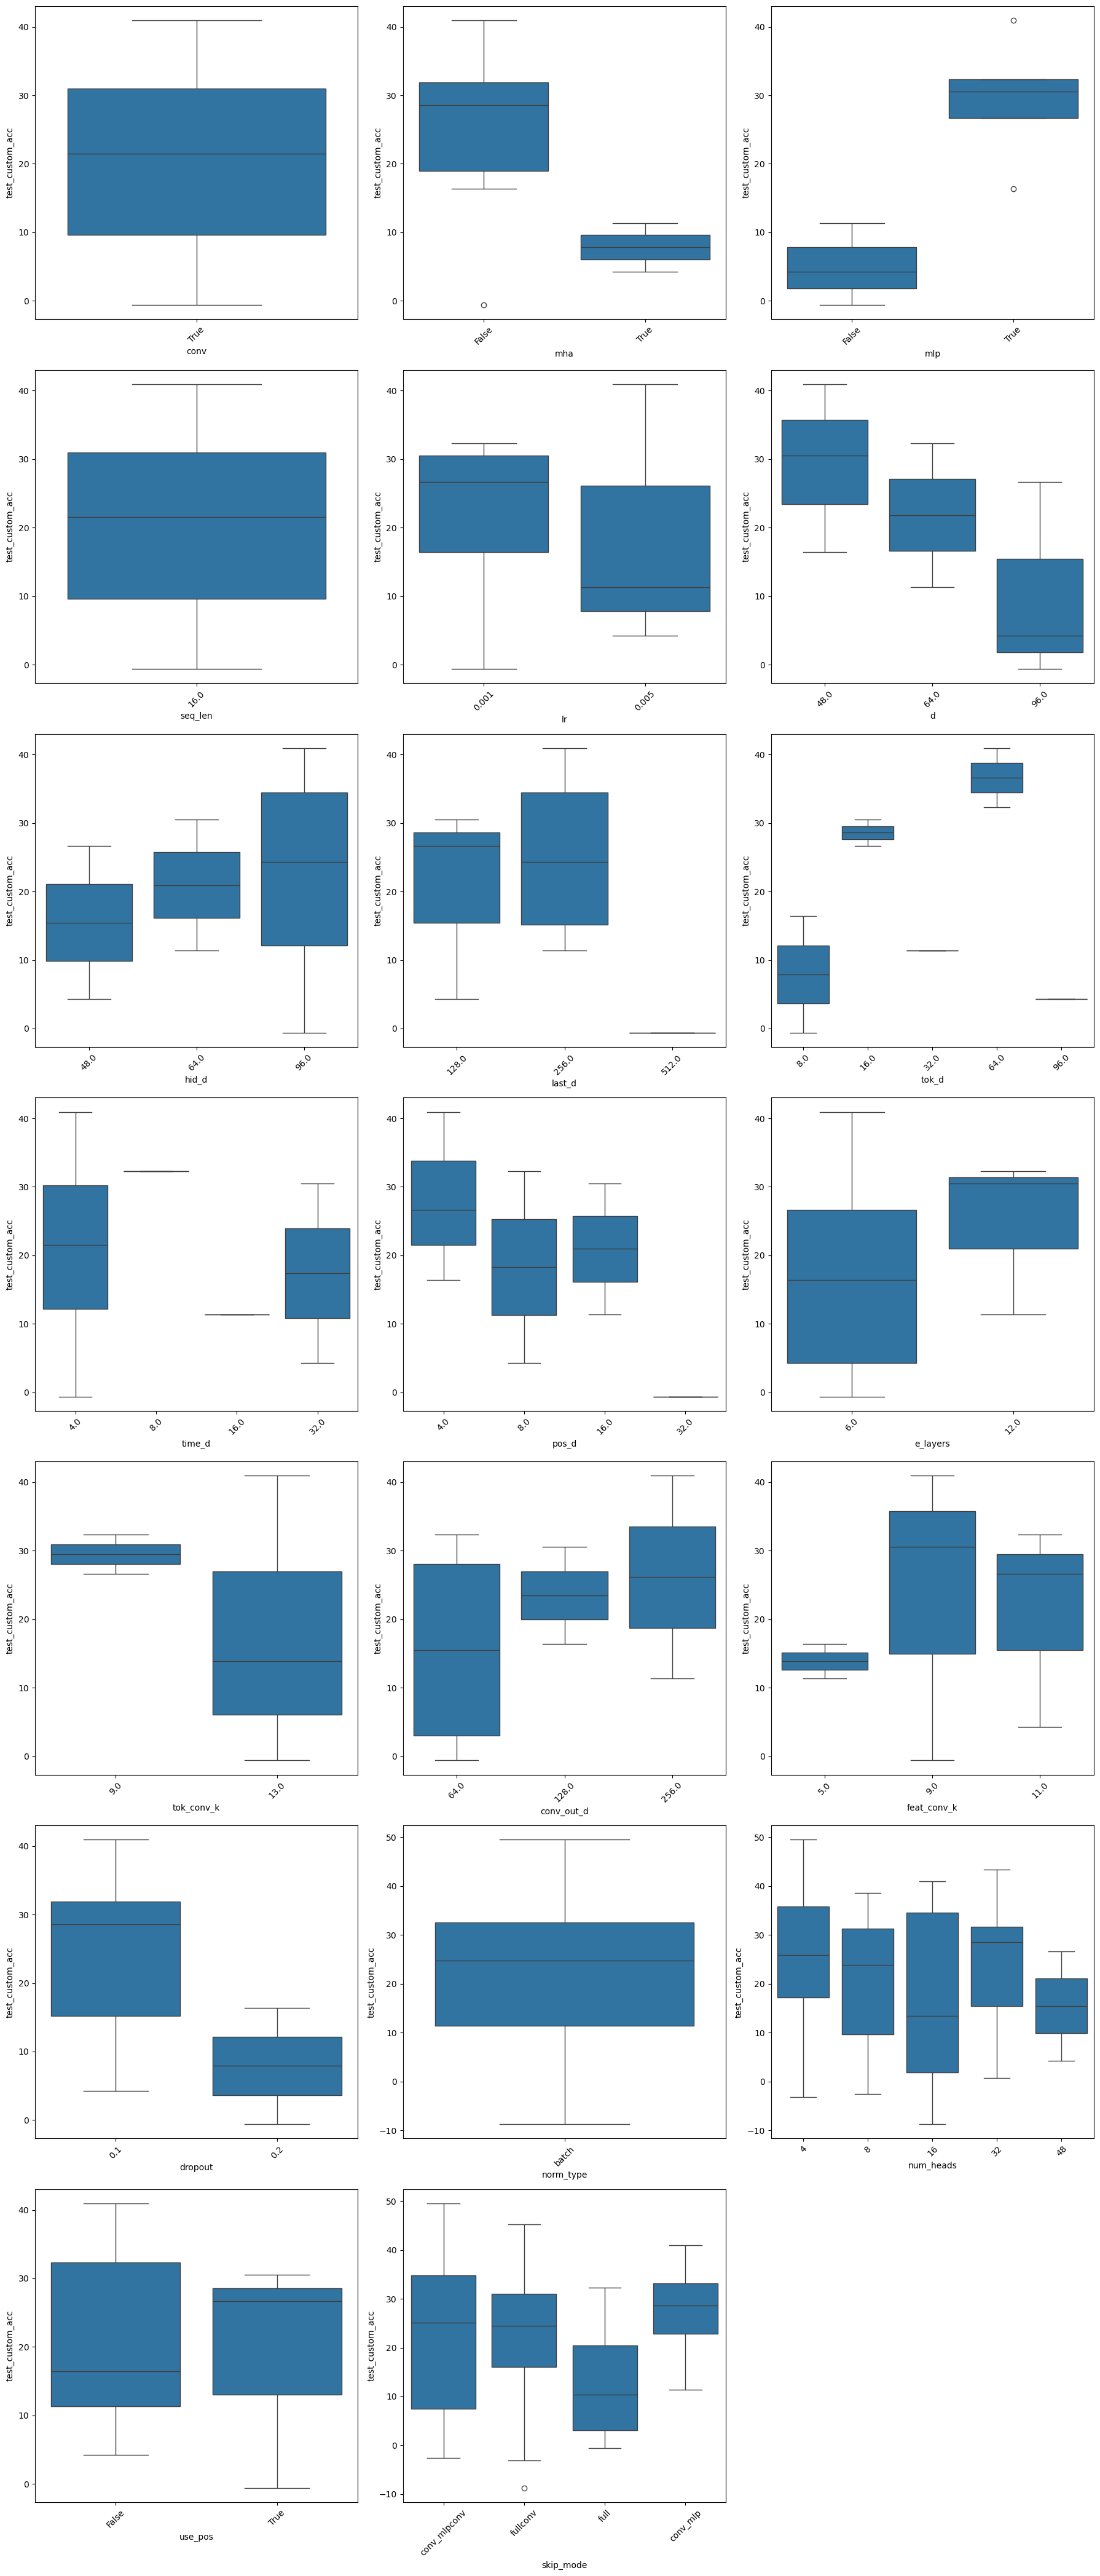

In [316]:
plot_features = [
    "conv",
    "mha",
    "mlp",
    "seq_len",
    "lr",
    "d",  # d_model
    "hid_d",  # hidden_d_model
    "last_d",  # last_d_model
    "tok_d",  # token_d_model
    "time_d",  # time_d_model
    "pos_d",  # pos_d_model
    "e_layers",
    "tok_conv_k",  # token_conv_kernel
    "conv_out_d",  # conv_out_dim
    "feat_conv_k",  # feat_conv_kernel
    "dropout",
    "norm_type",
    "num_heads",
    "use_pos",
    "skip_mode"
]

# Plotting the effects
plot_rmse_effects(df, x=plot_features)

In [317]:
# Calculate the sum of rmse values for each row

df["sum_rmse"] =  0*df["train_rmse"] +0.4* df["val_rmse"] + 0.4* df["test_rmse"]

# Sort the rows based on the sum of rmse values
sorted_df = df.sort_values(by="sum_rmse", ascending=True)


In [318]:
sorted_df.columns

Index(['exp_date', 'train_rmse', 'train_custom_acc', 'val_rmse_for_best_train',
       'val_custom_acc_for_best_train', 'test_rmse_for_best_train',
       'test_custom_acc_for_best_train', 'train_epoch_for_best_train',
       'val_rmse', 'val_custom_acc', 'train_rmse_for_best_val',
       'train_custom_acc_for_best_val', 'test_rmse_for_best_val',
       'test_custom_acc_for_best_val', 'val_epoch_for_best_val', 'test_rmse',
       'test_custom_acc', 'train_rmse_for_best_test',
       'train_custom_acc_for_best_test', 'val_rmse_for_best_test',
       'val_custom_acc_for_best_test', 'test_epoch_for_best_test', 'skip_mode',
       'True', 'False', '16', '0.005', '48', '96', '512', '32', '4', '12',
       '13', '128', '11dropout', 'norm_type', 'num_heads', 'bs', '0.001', '64',
       '8', '6', '9', '5dropout', '256', '9dropout', 'conv', 'mha', 'mlp',
       'use_pos', 'seq_len', 'lr', 'd', 'hid_d', 'last_d', 'tok_d', 'time_d',
       'pos_d', 'e_layers', 'tok_conv_k', 'conv_out_d', 'feat_co

In [319]:
selected_cols =['train_rmse','train_custom_acc', 'val_rmse','val_custom_acc','test_rmse_for_best_val', 'test_rmse', 'test_custom_acc','val_custom_acc_for_best_test'] 
sorted_df[selected_cols].head(10)

,train_rmse,train_custom_acc,val_rmse,val_custom_acc,test_rmse_for_best_val,test_rmse,test_custom_acc,val_custom_acc_for_best_test
88,17424.5430,82.409607,69168.180,47.930225,78498.300,70134.266,33.621811,39.146885
72,7275.6084,92.387886,70055.540,42.518276,76828.110,70132.880,34.779976,38.512859
33,9668.3160,89.099846,69194.430,40.010777,72887.580,71173.586,34.654621,43.817787
44,7444.3810,92.206772,69423.516,33.125549,74948.850,70989.550,28.575775,40.222015
67,12262.5630,87.523239,73054.336,51.305115,73948.445,68245.300,43.399693,46.716724
7,11402.9630,87.893089,69308.300,48.292149,80551.590,72470.700,30.033501,40.196281
54,9451.0470,89.794495,73904.660,47.698696,68339.380,68339.380,38.567421,47.698696
39,8339.9200,91.402428,67636.710,43.587967,78901.836,74708.510,32.585251,38.002773
55,11319.0320,87.336517,69381.780,46.271339,81400.370,73052.900,30.532387,40.994274
63,7509.6800,92.082314,69305.060,44.729500,75596.164,73527.570,35.305122,42.201275


In [320]:

# Print the top rows with the minimal sum of rmse
top_n = 10  # Number of top rows to print


# Drop the specified columns
columns_to_drop = [
    # "train_custom_acc_for_best_val",
    # "train_custom_acc",
    # "val_custom_acc",
    # "test_custom_acc",
    # "train_custom_acc_for_best_test",
    # "val_custom_acc_for_best_train",
    # "val_custom_acc_for_best_test",
    # "test_custom_acc_for_best_train",
    # "test_custom_acc_for_best_val",
]

output = sorted_df.head(top_n).drop(columns=columns_to_drop)



In [321]:

# print last few columns
print(output.iloc[:, -16:])

     mlp use_pos  seq_len     lr     d  hid_d  last_d  tok_d  time_d  pos_d  \
88   NaN     NaN      NaN    NaN   NaN    NaN     NaN    NaN     NaN    NaN   
72   NaN     NaN      NaN    NaN   NaN    NaN     NaN    NaN     NaN    NaN   
33   NaN     NaN      NaN    NaN   NaN    NaN     NaN    NaN     NaN    NaN   
44   NaN     NaN      NaN    NaN   NaN    NaN     NaN    NaN     NaN    NaN   
67   NaN     NaN      NaN    NaN   NaN    NaN     NaN    NaN     NaN    NaN   
7    NaN     NaN      NaN    NaN   NaN    NaN     NaN    NaN     NaN    NaN   
54   NaN     NaN      NaN    NaN   NaN    NaN     NaN    NaN     NaN    NaN   
39   NaN     NaN      NaN    NaN   NaN    NaN     NaN    NaN     NaN    NaN   
55  True    True     16.0  0.001  48.0   64.0   128.0   16.0    32.0   16.0   
63   NaN     NaN      NaN    NaN   NaN    NaN     NaN    NaN     NaN    NaN   

    e_layers  tok_conv_k  conv_out_d  feat_conv_k  dropout    sum_rmse  
88       NaN         NaN         NaN          NaN      Na